In [26]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras.callbacks import TensorBoard
from keras import backend as K
K.set_image_dim_ordering('tf')
from time import time
import numpy as np
import matplotlib.pyplot as plt
import random
import csv
%matplotlib inline

In [4]:
def load_data():
    print('loading data...')
    start = time()
    X = np.loadtxt('rgbframes.csv',delimiter=',',dtype=np.float32)
    X.shape=(-1,180,320,3)
    print('Job completed in {} seconds'.format(time()-start))
    return X
#X = load_data()

print('loading data...')
start = time()
file = open('rgbframes.csv','r')
content = csv.reader(file,delimiter=',')
X = []
for c in content:
    d = [float(n) for n in c]
    X.append(d)
file.close()
X = np.array(X).reshape(-1,180,320,3)
print('Job completed in {} seconds'.format(time()-start))
print(X.shape)

loading data...
Job completed in 1625.6827929019928 seconds
(2032, 180, 320, 3)


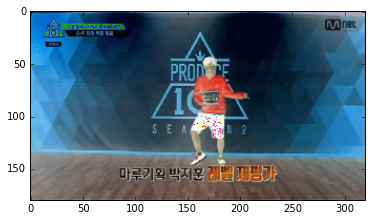

In [5]:
plt.imshow(X[25])

In [23]:
(320-16)/16

19.0

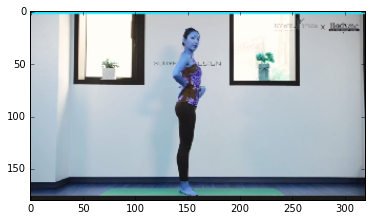

In [11]:
data = X
np.random.shuffle(data)
data = data / 255
n = 1650
train = data[:n]
test = data[n:]
plt.imshow(test[0])

In [32]:
input_img = Input(shape=(180,320,3))

e1 = Conv2D(16,(15,15),activation='relu',padding='same')(input_img) #166 306 16
e2 = MaxPooling2D((2,2), padding='same')(e1) #83 153 16
e3 = Conv2D(8,(5,5),activation='relu',padding='same')(e2) #79 149 8
e4 = MaxPooling2D((2,2),padding='same')(e3) #40 75 8

d2 = UpSampling2D((2,2))(e4)
d3 = Conv2D(8,(5,5),activation='relu',padding='same')(d2)
d4 = UpSampling2D((2,2))(d3)
decoded = Conv2D(3,(15,15),activation='sigmoid',padding='same')(d4)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta',loss='binary_crossentropy')

encoder = Model(input_img, e4)
encoded_input = Input(shape=(40,75,8))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))


In [33]:

autoencoder.fit(train,train, epochs=20, batch_size=32, 
                validation_data=(test,test),
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])

Train on 1650 samples, validate on 382 samples
Epoch 1/20
1650/1650 [==============================] - 1798s - loss: 0.6680 - val_loss: 0.6660
Epoch 2/20
1650/1650 [==============================] - 1964s - loss: 0.6412 - val_loss: 0.6071
Epoch 3/20
1650/1650 [==============================] - 1856s - loss: 0.6173 - val_loss: 0.6105
Epoch 4/20
1650/1650 [==============================] - 1837s - loss: 0.6093 - val_loss: 0.5927
Epoch 5/20
1650/1650 [==============================] - 1859s - loss: 0.6034 - val_loss: 0.5923
Epoch 6/20
1650/1650 [==============================] - 1807s - loss: 0.6015 - val_loss: 0.6014
Epoch 7/20
1650/1650 [==============================] - 1795s - loss: 0.5987 - val_loss: 0.5838
Epoch 8/20
1650/1650 [==============================] - 1799s - loss: 0.5947 - val_loss: 0.5924
Epoch 9/20
1650/1650 [==============================] - 1848s - loss: 0.5941 - val_loss: 0.5891
Epoch 10/20
1650/1650 [==============================] - 1840s - loss: 0.5925 - val_loss:

In [34]:
decoded_imgs = autoencoder.predict(test)

NameError: name 'lt' is not defined

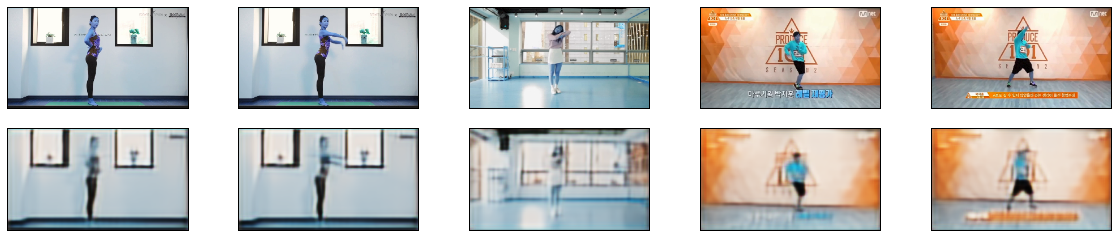

In [36]:
n=5
plt.figure(figsize=(20,4))
for i in range(n):
    ax = plt.subplot(2, n, i+1)
    img = test[i*4]
    plt.imshow(img)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(2, n, i+1+n)
    newimg = decoded_imgs[i*4]
    plt.imshow(newimg)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [41]:
encoded_imgs = encoder.predict(test)
decoded_e = decoder.predict(encoded_imgs)

In [40]:
print(encoded_imgs.shape)
encoded_input = Input(shape=(45,80,8))
decoder = Model(encoded_input, decoder_layer(encoded_input))

(382, 45, 80, 8)


In [44]:
encodedhere = encoded_imgs.reshape(-1, 45*80, 8)
print(encodedhere.shape)
newE = []
for i, img in enumerate(encodedhere):
    newE.append(encodedhere[i].T) #-1 8, 45*80

(382, 3600, 8)


In [48]:
newE = np.array(newE).reshape(-1,8,45,80)

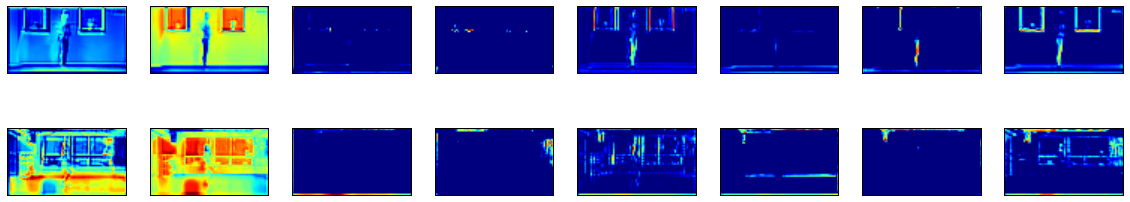

In [50]:
n=8
plt.figure(figsize=(20,4))
for i in range(n):
    ax = plt.subplot(2, n, i+1)
    img = newE[0][i]
    plt.imshow(img)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(2, n, i+1+n)
    newimg = newE[1][i]
    plt.imshow(newimg)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()